/home/shangru/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


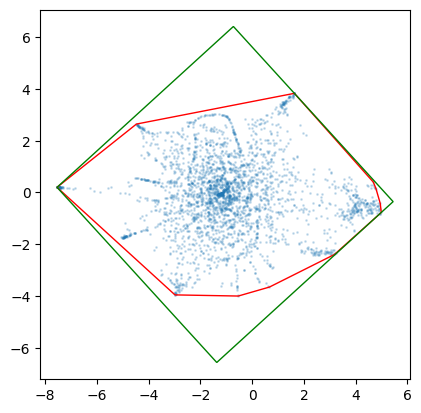

In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
import pandas as pd
import numpy as np
import pickle
from sklearn.manifold import TSNE

train_rna = pd.read_csv("train_ref.csv", index_col=0)
val_rna = pd.read_csv("val_ref.csv", index_col=0)
query_rna = pd.read_csv("query_ref.csv", index_col=0)

tsne = TSNE(n_components=2, perplexity=50, metric='euclidean', random_state=0, n_jobs=-1, learning_rate="auto", init='pca')
it = ImageTransformer(feature_extractor=tsne, pixels=224, random_state=0, n_jobs=-1)
it.fit(train_rna.iloc[:, :-1], plot=True)
#save image transformer
with open("/Usersdata/shangru/docker/pretrained_l2/img_transformer_ref.obj","wb") as f:
    pickle.dump(it, f)

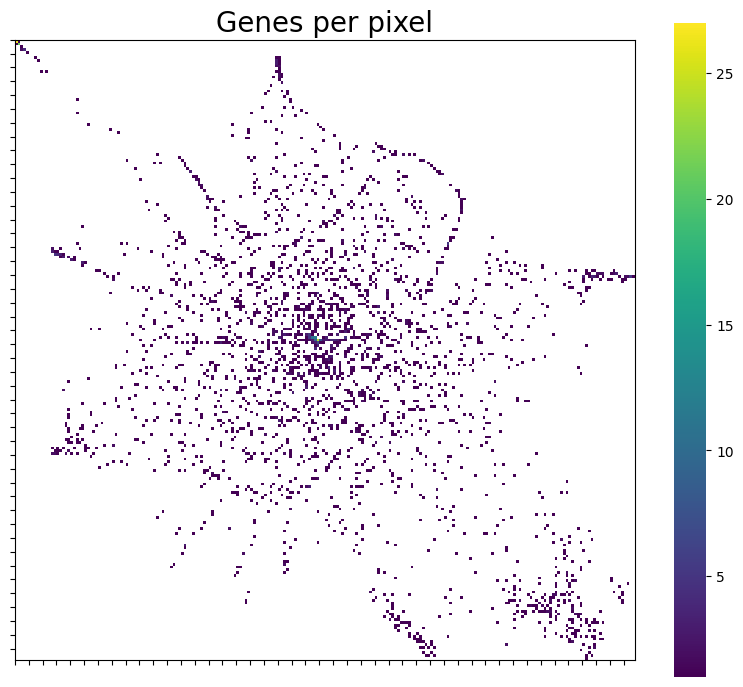

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 8.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel", fontsize = 20)

In [3]:
rna_list = np.array_split(train_rna, 4)
rna1 = rna_list[0]
img_1 = (it.transform(rna1.iloc[:, :-1])*255).astype(np.uint8)
rna2 = rna_list[1]
img_2 = (it.transform(rna2.iloc[:, :-1])*255).astype(np.uint8)
rna3 = rna_list[2]
img_3 = (it.transform(rna3.iloc[:, :-1])*255).astype(np.uint8)
rna4 = rna_list[3]
img_4 = (it.transform(rna4.iloc[:, :-1])*255).astype(np.uint8)

path = '/Usersdata/shangru/docker/pretrained_l2/train_ref.npy'
X_train_img_rna = np.concatenate((img_1, img_2, img_3, img_4), axis=0)
np.save(path, X_train_img_rna)

path = '/Usersdata/shangru/docker/pretrained_l2/val_ref.npy'
X_val_img_rna = (it.transform(val_rna.iloc[:, :-1])*255).astype(np.uint8)
np.save(path, X_val_img_rna)

path = '/Usersdata/shangru/docker/pretrained_l2/query_ref.npy'
X_query_img_rna = (it.transform(query_rna.iloc[:, :-1])*255).astype(np.uint8)
np.save(path, X_query_img_rna)